# Analysis of the popularity of the name Estera in Poland across the years 2000-2023

Importing the necessary libraries and the datasets containing the data on the number of newborns with the name Estera in Poland in the years 2000-2019 and 2019-2023.

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_00_19 = pd.read_csv('datasets/imiona2000-2019.csv')
data_19_23 = [pd.read_csv('datasets/2019.csv'),
              pd.read_csv('datasets/2020.csv'),
              pd.read_csv('datasets/2021.csv'),
              pd.read_csv('datasets/2022.csv'),
              pd.read_csv('datasets/2023.csv')]

Uniforming the column names in the datasets and removing the unnecessary columns.

In [165]:
cols = data_19_23[0].columns
cols_22 = data_19_23[3].columns
data_19_23[3].rename(columns={cols_22[0]: cols[0], cols_22[1]: cols[1], cols_22[2]: cols[2], cols_22[3]: cols[3], cols_22[4]: cols[4]}, inplace=True)

for dataset in data_19_23:
    dataset.drop(['WOJ', 'PŁEĆ'], axis=1, inplace=True)
    bwru_idx = dataset[dataset['WOJEWÓDZTWO'] == 'Brak województwa rejestracji urodzenia'].index
    dataset.drop(bwru_idx, inplace=True)

Preparation of the data for the plot analysis.

In [166]:
regions = list(data_19_23[0]['WOJEWÓDZTWO'].unique())

years = list(data_00_19['Rok'].unique())
years.extend([2020, 2021, 2022, 2023])
estera_data_00_23 = list(data_00_19[data_00_19['Imię'] == 'ESTERA']['Liczba'])
for idx, dataset in enumerate(data_19_23):
    if idx != 0:
        estera_data_00_23.append(dataset[dataset['IMIĘ_PIERWSZE'] == 'ESTERA']['LICZBA_WYSTĄPIEŃ'].sum())

### Plotting the number of newborns with the name Estera in the years 2000-2019.

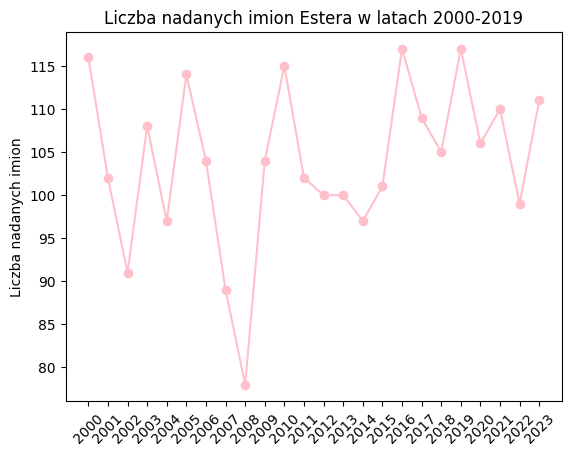

In [167]:
plt.plot(years, estera_data_00_23, marker='o', color='pink')
plt.ylabel('Liczba nadanych imion')
plt.title('Liczba nadanych imion Estera w latach 2000-2019')
plt.xticks(years, rotation=45)
plt.show()

### Plotting the number of newborns with the name Estera in the years 2019-2023 across the regions.

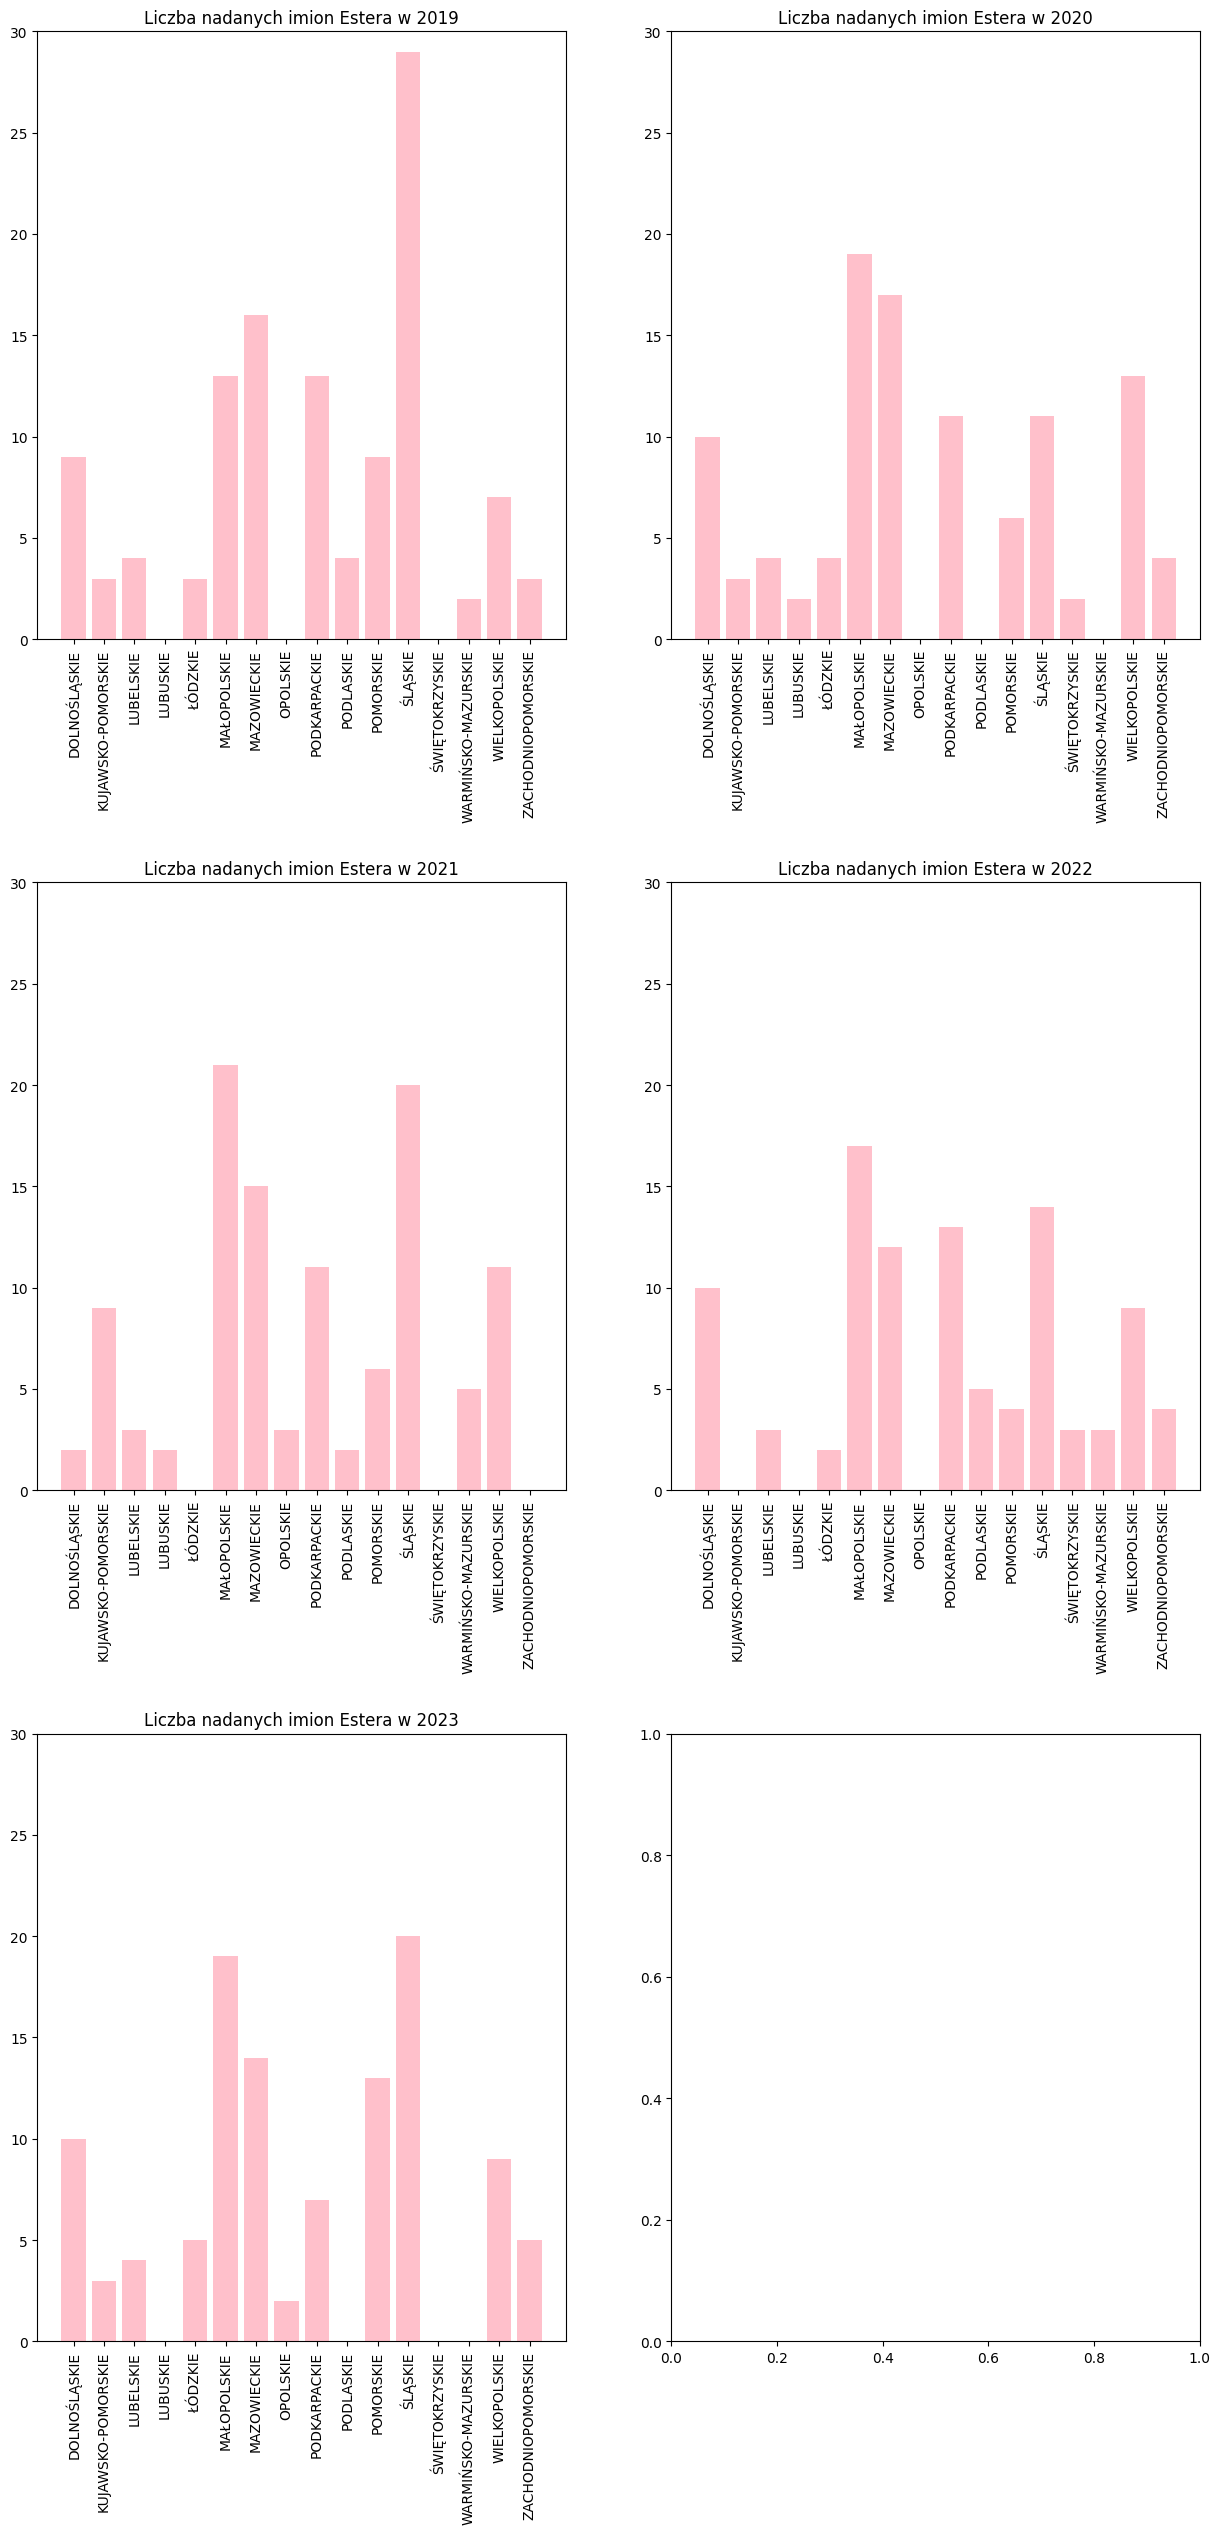

In [168]:
fig, ax = plt.subplots(3, 2, figsize=(15, 30))
for i in range(3):
    for j in range(2):
        idx = i*2 + j
        if idx < len(data_19_23):
            regional_estera = []
            for reg in regions:
                regional_estera.append(data_19_23[idx].loc[(data_19_23[idx]['WOJEWÓDZTWO'] == reg) & (data_19_23[idx]['IMIĘ_PIERWSZE'] == 'ESTERA'), 'LICZBA_WYSTĄPIEŃ'].sum())
            ax[i, j].bar(regions, regional_estera, color='pink')
            ax[i, j].set_title(f'Liczba nadanych imion Estera w {2019 + idx}')
            ax[i, j].set_xticks(np.arange(len(regions)))
            ax[i, j].set_xticklabels(regions, rotation=90)
            ax[i, j].set_ylim([0, 30])

plt.subplots_adjust(hspace=0.4)
plt.show()

### Plotting the percentage of newborns with the name Estera in the years 2019-2023 per regions.

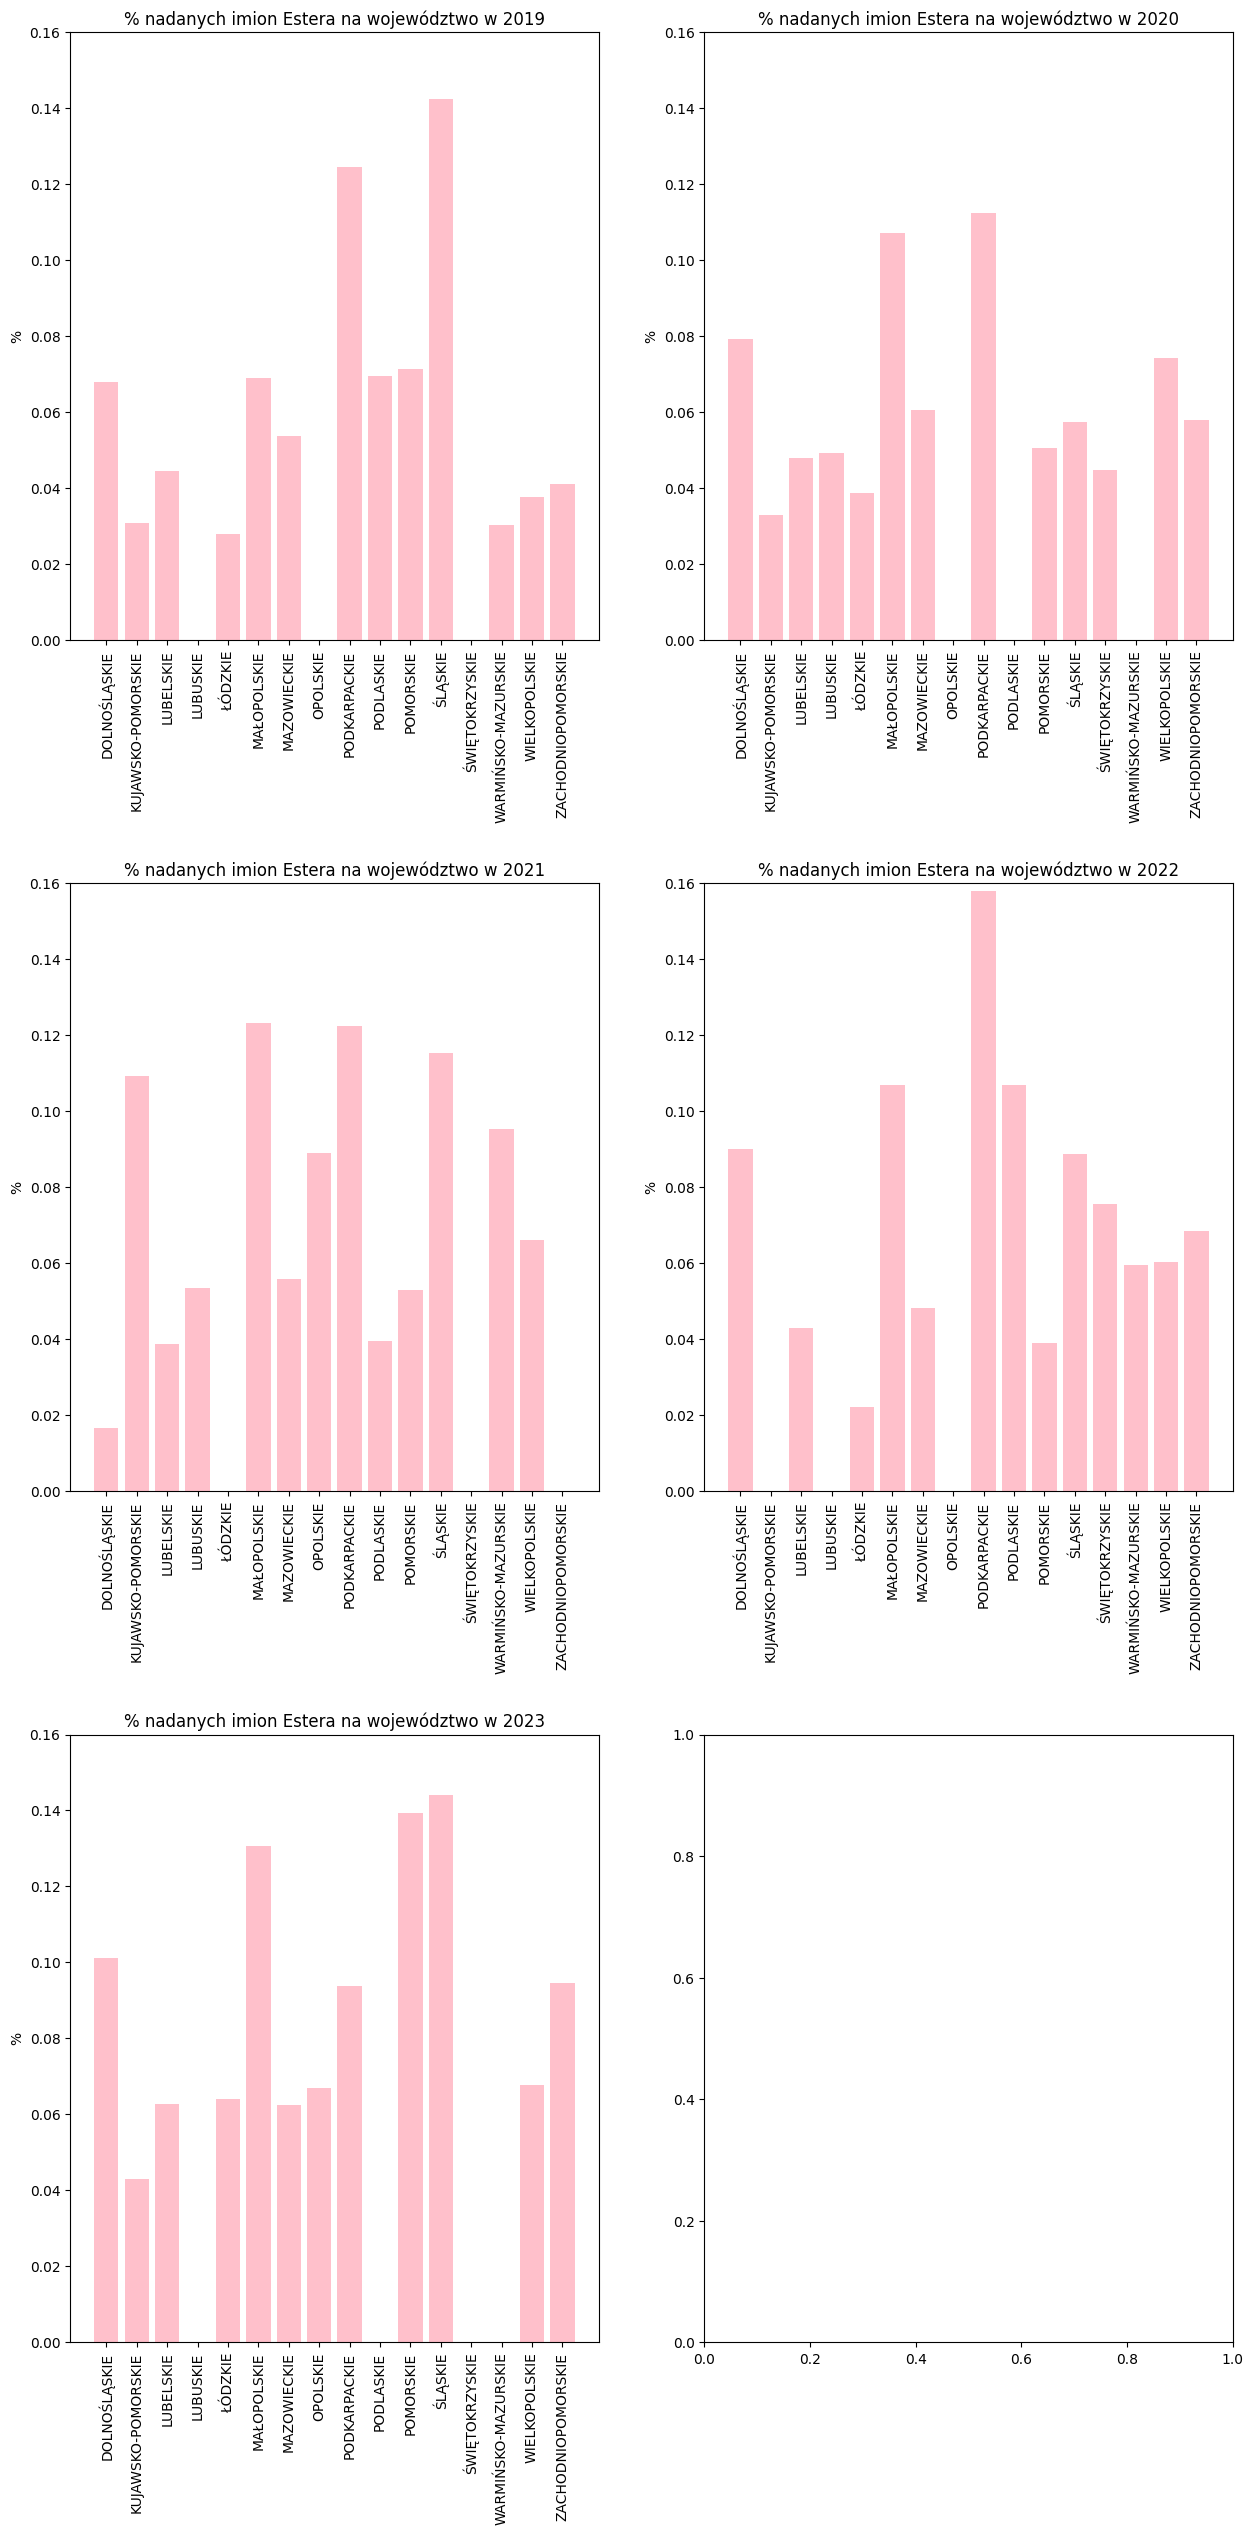

In [169]:
fig, ax = plt.subplots(3, 2, figsize=(15, 30))
for i in range(3):
    for j in range(2):
        idx = i*2 + j
        if idx < len(data_19_23):
            regional_estera = []
            regional_total = []
            for reg in regions:
                regional_estera.append(data_19_23[idx].loc[(data_19_23[idx]['WOJEWÓDZTWO'] == reg) & (data_19_23[idx]['IMIĘ_PIERWSZE'] == 'ESTERA'), 'LICZBA_WYSTĄPIEŃ'].sum())
                regional_total.append(data_19_23[idx].loc[data_19_23[idx]['WOJEWÓDZTWO'] == reg, 'LICZBA_WYSTĄPIEŃ'].sum())
            ax[i, j].bar(regions, np.divide(regional_estera, regional_total)*100, color='pink')
            ax[i, j].set_title(f'% nadanych imion Estera na województwo w {2019 + idx}')
            ax[i, j].set_xticks(np.arange(len(regions)))
            ax[i, j].set_xticklabels(regions, rotation=90)
            ax[i, j].set_ylim([0, 0.16])
            ax[i, j].set_ylabel('%')

plt.subplots_adjust(hspace=0.4)
plt.show()